# 5.4 Linear Regression을 사용한 보스턴 주택 가격 예측

## Ordinary Least Squares(OLS)

- 입력 피처의 독립성에 많은 영향을 받는다.
- 다중공선성(multi-collinearity) : 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다.
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고, 제거하거나 규제를 적용함
- 매우 많은 피처가 다중공선성의 문제를 가지고 있으면 PCA를 통해 차원 축소를 수행하기도 함

### 회귀 성능 지표

1. MAE : Mean Absolute Error, 실제 값과 예측 값의 차이를 절대값으로 변환해 평균
2. MSE : Mean Squared Error, 실제 값과 예측 값의 차이를 제곱해 평균
3. RMSE : Root Mean Squared Error, MSE에 root씌움. MSE 값이 너무 커서
4. $R^2$ : 분산 기반으로 예측 성능 평가. 1에 가까울 수록 예측 정확도가 높음. $R^2 = \frac{예측값 Varience}{실제값 Varience}$

* metrics의 Scoring 함수를 적용 했을 때 neg_...과 같이 neg를 붙이는 이유는 error값이 작을 수록 좋기 때문에 값을 비교할 때 순서를 바꾸기 위함이다. 예를 들어 10 > 1를 -1 > -10으로 바꾼다.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# boston 데이터 세트
boston = load_boston()

# to dataframe
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)

# target = price
bostondf['PRICE'] = boston.target
print(bostondf.shape)
bostondf.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


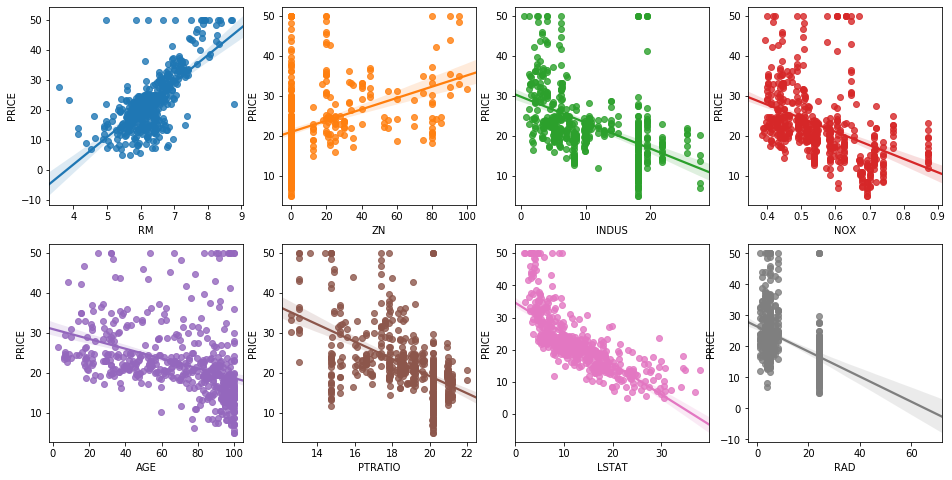

In [3]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostondf, ax=axs[row][col])

In [8]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test, y_preds))
print(lr.intercept_)
print(np.round(lr.coef_, 1))

17.29691590790215 4.158956107955715
0.7572263323138921
40.995595172164336
[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [9]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [11]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_rmse, 2))



[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.83
